In [178]:
run doomed.py

In [124]:
u = 0.02
s = 0.06
n0 = 1000

In [179]:
%%time
pop_size, mutations, extinct_time, clicks = simult([n0], 1000, s, u, K=np.inf)

/Users/rbazev/Documents/GitHub/doomed/python/doomed.py:971: RuntimeWarning: divide by zero encountered in true_divide
  for j in range(len(nn[i])):


CPU times: user 10.1 s, sys: 115 ms, total: 10.2 s
Wall time: 11.1 s


In [182]:
nclicks = np.array([len(c) for c in clicks])
np.mean(nclicks)

0.674

In [126]:
tmax = 401
t = np.arange(tmax)
mean_n = pop_size.mean(axis=1)[:tmax]
std_n = pop_size.std(axis=1, ddof=1)[:tmax]
expect_n = [N(1000, s, u, t) for t in range(tmax)]

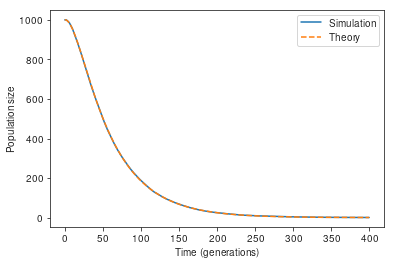

In [130]:
plt.plot(t, mean_n, label='Simulation')
plt.plot(t, expect_n, '--', label='Theory')
plt.xlabel('Time (generations)')
plt.ylabel('Population size')
plt.legend();

In [135]:
tmax = 101
t = np.arange(tmax)
mean_mut = mutations.mean(axis=1)[:tmax]
# std_mut = mutations.std(axis=1, ddof=1)[:tmax]
expect_mut = [mut(s, u, t) for t in range(tmax)]

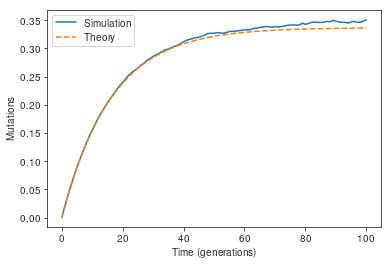

In [148]:
plt.plot(t, mean_mut, label='Simulation')
plt.plot(t, expect_mut, '--', label='Theory')
plt.xlabel('Time (generations)')
plt.ylabel('Mutations')
plt.legend();

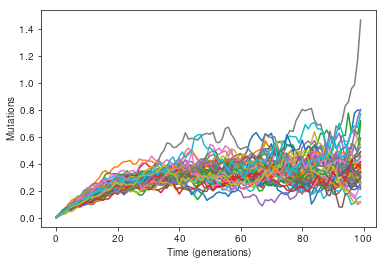

In [157]:
for i in range(50):
    plt.plot(mutations[:100,i])
plt.xlabel('Time (generations)')
plt.ylabel('Mutations');

In [146]:
extinct_time.min()

103

In [145]:
extinct_time[extinct_time < 70]

array([], dtype=int64)

In [54]:
phi_k([0, 1, 2, 3], 2, .06, .02)

2.3609207199999998

In [55]:
phi_k([0, 1, 2, 3], 3, .06, .02)

4.322336

In [56]:
phi([0] * 6, .06, .02)

[0.5, 0.53, 0.5582, 0.584708, 0.60962552, 0.6330479888]

In [57]:
phit(20, [0.] * 6, .06, .02)

[0.9262260756151104,
 0.9671399057895237,
 0.9871075251957672,
 0.9953806321727035,
 0.9984310259191395,
 0.9994164755927606]

In [58]:
p_extinct(1000, 200, 50, .06, .02)

0.4615055653547688

In [59]:
T(1000, 100, .06, .02, 1e-8)

215.6014812186036

In [60]:
x = np.array([39, 20, 4, 1])
(np.arange(len(x)) * x).sum() / x.sum()

0.484375

In [61]:
range(4)

range(0, 4)

In [62]:
x = [39, 20, 4, 1]
k = range(len(x))
sum([i * x[i] for i in k]) / sum(x)

0.484375

In [12]:
import pandas as pd

In [2]:
u = 0.02
s = 0.06

In [15]:
%%time
print("n0 K median_t mean_t std_t")
for n0 in [10, 100, 1000, 10000]:
    for K in [np.infty, n0]:
        pop_size, extinct_time = simult([n0], 1000, s, u, K=K)
        print(n0, K, np.median(extinct_time), extinct_time.mean(), extinct_time.std(ddof=1))

n0 K median_t mean_t std_t
10 inf 24.0 34.535 35.21060297071837
10 10 16.0 19.079 13.799970949179501
100 inf 98.0 109.311 55.862141543784894
100 100 87.0 99.057 50.446432912482464
1000 inf 208.0 216.232 62.46854003812235
1000 1000 202.0 212.063 60.784865146110434
10000 inf 322.0 336.821 67.69487096194626
10000 10000 316.0 326.193 63.884967246137336
CPU times: user 5min 30s, sys: 781 ms, total: 5min 31s
Wall time: 5min 32s


In [16]:
data = pd.read_clipboard(sep=' ')
data

,n0,K,median_t,mean_t,std_t
0,10,inf,24.0,34.535,35.210603
1,10,1.000000e+01,16.0,19.079,13.799971
2,100,inf,98.0,109.311,55.862142
3,100,1.000000e+02,87.0,99.057,50.446433
4,1000,inf,208.0,216.232,62.468540
5,1000,1.000000e+03,202.0,212.063,60.784865
6,10000,inf,322.0,336.821,67.694871
7,10000,1.000000e+04,316.0,326.193,63.884967


In [25]:
tmp1 = data.loc[data['K']==np.infty]
tmp2 = data.loc[data['K']<np.infty]

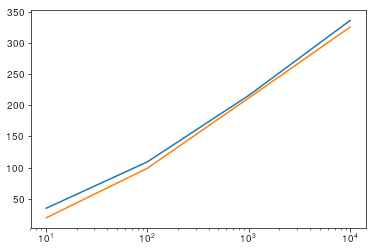

In [29]:
plt.semilogx(tmp1['n0'], tmp1['mean_t'])
plt.semilogx(tmp2['n0'], tmp2['mean_t'])